Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [277]:
from itertools import accumulate
from icecream import ic
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [278]:
NUM_KNAPSACKS = 2
NUM_ITEMS = 10
NUM_DIMENSIONS = 2

In [279]:
VALUES = np.random.randint(0, 100, size=NUM_ITEMS)
WEIGHTS = np.random.randint(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = np.random.randint(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [280]:
VALUES

array([90, 30, 45, 59, 86, 73, 10, 78, 52, 88], dtype=int32)

In [281]:
WEIGHTS

array([[41, 17],
       [33, 60],
       [72, 63],
       [57, 91],
       [72, 17],
       [88, 54],
       [40, 73],
       [64, 14],
       [85, 78],
       [99, 53]], dtype=int32)

In [282]:
CONSTRAINTS

array([334,  20], dtype=int32)

In [283]:
# A random solution
solution = np.array(
    [np.random.random(NUM_ITEMS) < 0.5 for _ in range(NUM_KNAPSACKS)], dtype=np.bool
)

In [284]:
solution

array([[ True,  True,  True,  True, False,  True, False,  True,  True,
        False],
       [False,  True, False, False,  True, False, False,  True,  True,
         True]])

In [285]:
# Check that the same object does not appear in multiple knapsacks
np.all(solution.sum(axis=0) <= 1)

np.False_

In [286]:
# Check if the solution is valid
all_knapsacks = np.any(solution, axis=0)
np.all(WEIGHTS[all_knapsacks].sum(axis=0) < CONSTRAINTS)

np.False_

## TEST PROBLEMS

In [287]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [251]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [271]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

RMHC with a more powerfull twick

In [288]:
MAX_STEPS = 20000

In [289]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < CONSTRAINTS):
        return np.sum(VALUES[knapsack])
    else:
       return -1

In [290]:
def tweak(knapsack, items_taken):
    new_knapsack = knapsack.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_ITEMS)
        if items_taken[index] == True:
            index = None
        else:
            new_knapsack[index] = not new_knapsack[index]
    return new_knapsack


100%|██████████| 20000/20000 [00:01<00:00, 13877.60it/s]
ic| evaluate(best_solution): np.int64(766)
ic| history.index(evaluate(best_solution)): 647
100%|██████████| 20000/20000 [00:01<00:00, 12358.52it/s]
ic| evaluate(best_solution): np.int64(283)
ic| history.index(evaluate(best_solution)): 367
100%|██████████| 20000/20000 [00:03<00:00, 6620.95it/s]
ic| evaluate(best_solution): np.int64(16)
ic| history.index(evaluate(best_solution)): 4


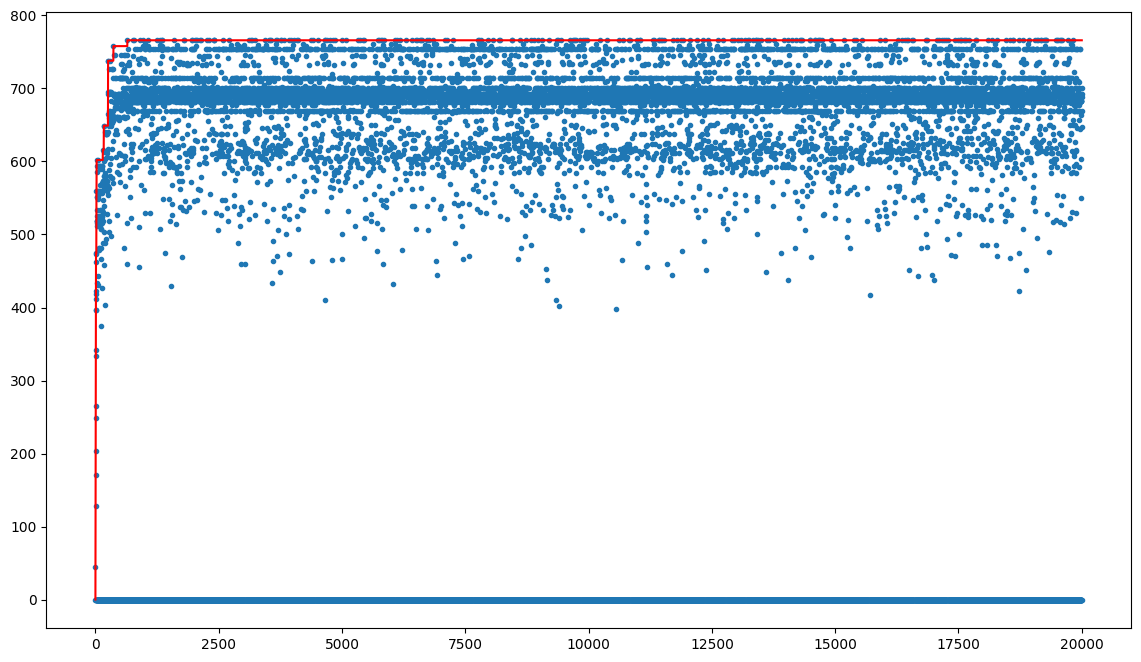

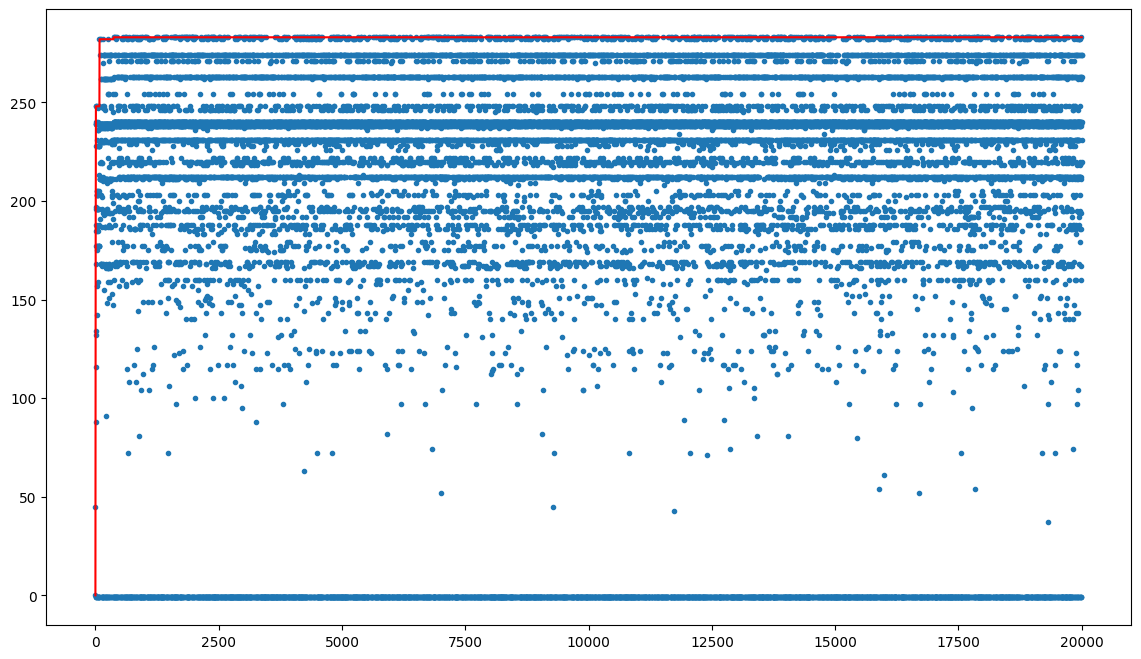

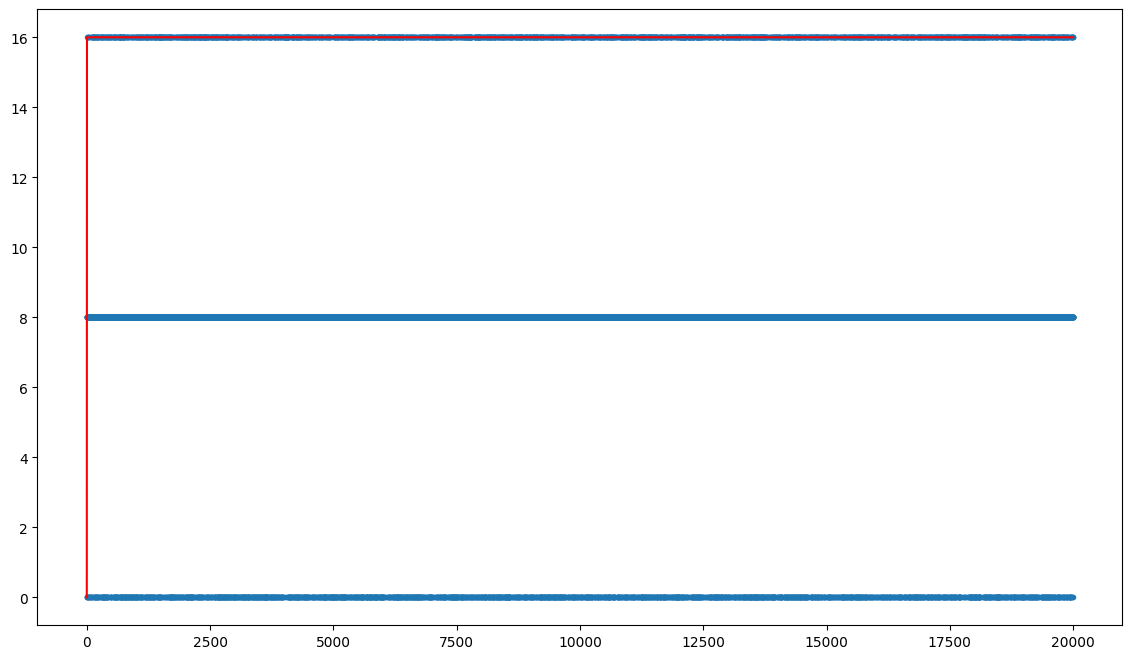

In [291]:
solution = np.full((NUM_KNAPSACKS, NUM_ITEMS), False)
items_taken = np.full(NUM_ITEMS, False)

for knapsack_id in range(NUM_KNAPSACKS):
    knapsack = solution[knapsack_id]
    best_solution = knapsack

    history = [evaluate(best_solution)]
    for n in tqdm(range(MAX_STEPS)):
        new_solution = tweak(best_solution, items_taken)
        history.append(evaluate(new_solution))
        if evaluate(new_solution) > evaluate(best_solution):
            best_solution = new_solution

    items_taken = items_taken + best_solution
    solution[knapsack_id] = best_solution

    # That's all...
    ic(evaluate(best_solution))
    ic(history.index(evaluate(best_solution)))

    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    _ = plt.scatter(range(len(history)), history, marker=".")

In [292]:
total_value = 0
total_weights = np.zeros((NUM_KNAPSACKS, WEIGHTS.shape[1]))

for knapsack_id in range(NUM_KNAPSACKS):
    total_value += np.sum(VALUES[solution[knapsack_id]], axis=0)
    total_weights[knapsack_id] = np.sum(WEIGHTS[solution[knapsack_id]], axis=0)

print(total_value)

#ic(total_weights)

#print("Vincoli", CONSTRAINTS)

1065


In [293]:
solution

array([[False,  True,  True, False, False,  True, False,  True, False,
        False, False,  True,  True,  True, False,  True,  True,  True,
         True, False],
       [False, False, False,  True,  True, False, False, False,  True,
         True,  True, False, False, False,  True, False, False, False,
        False,  True],
       [ True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])